# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.10000000149011612
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.09000000171363354
Score (max over agents) from episode 5: 0.09000000171363354


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
import numpy as np
from maddpg_agent import MADDPGAgent
from collections import deque
import matplotlib.pyplot as plt
import torch
from unityagents import UnityEnvironment
from tensorboardX import SummaryWriter

In [2]:
env = UnityEnvironment(file_name='Tennis')
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [3]:
state_sizes = []
action_sizes = []
for i in range(num_agents):
    state_sizes.append(state_size)
    action_sizes.append(action_size)

agent = MADDPGAgent(num_agents=num_agents, state_sizes=state_sizes, action_sizes=action_sizes, random_seed=2)

In [4]:
import shutil
import os

log_path = os.getcwd()+"\log"    
print(log_path)
if os.path.exists(log_path):
    shutil.rmtree(log_path)
os.makedirs(log_path, exist_ok=True)

logger = SummaryWriter(log_dir=log_path)

C:\Users\my\Documents\GitHub\maddpg\log


In [5]:
def madddpg_train(n_episodes=5000, max_t=500, print_every=1):

    scores = []
    scores_deque = deque(maxlen=100)    
    
    np.random.seed(1)
    torch.manual_seed(1)
    
    for i_episode in range(1, n_episodes+1):
    
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations        # current state (for each agent)
        agent_scores = np.zeros(num_agents)          # initialize agents' scores
        agent.reset()                                # reset noise process for action exploration
        
        for t in range(max_t):     
            
            actions = agent.act(states, True)            
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished   
            agent.step(states, actions, rewards, next_states, dones, logger) 
            agent_scores += rewards                            # update the score (for each agent)
            states = next_states                               # enter next states            
            if np.any(dones):
                break
        
        scores_deque.append(np.max(agent_scores))
        scores.append(np.max(agent_scores))
                
        print('\nEpisode {}\tMax Score: {:.4f}\tSteps: {:.1f}'.format(i_episode, np.max(agent_scores), t), end="")   
        
        logger.add_scalar('mean_episode_rewards', np.mean(agent_scores), i_episode)
        logger.add_scalar('max_episode_rewards', np.max(agent_scores), i_episode)
        logger.add_scalar('num_of_steps_for_episode', t, i_episode)
            
        if i_episode % print_every == 0:                          
            print('\rEpisode {}\tMax Score: {:.4f} \tAvg Reward: {:.4f}\tSteps: {:.1f}'.format(i_episode, np.max(agent_scores), np.mean(scores_deque), t), end="")                           
            
        # environment is considered solved if we can mantain an average reward value of +0.5 over 100 consecutive episodes.
        if np.mean(scores_deque) >= 0.5:
            if len(scores_deque) >= 100:
                print('\rEnvironment solved in {:d} episodes!\tAverage Reward: {:.4f}'.format(i_episode, np.mean(scores_deque)))
                agent.save()
                return scores 
            
    return scores

scores = madddpg_train()


Episode 1	Max Score: 0.0000 	Avg Reward: 0.0000	Steps: 14.0
Episode 2	Max Score: 0.0000 	Avg Reward: 0.0000	Steps: 13.0
Episode 3	Max Score: 0.0000 	Avg Reward: 0.0000	Steps: 13.0
Episode 4	Max Score: 0.0000 	Avg Reward: 0.0000	Steps: 13.0
Episode 5	Max Score: 0.0000 	Avg Reward: 0.0000	Steps: 13.0
Episode 6	Max Score: 0.0000 	Avg Reward: 0.0000	Steps: 14.0
Episode 7	Max Score: 0.0000 	Avg Reward: 0.0000	Steps: 13.0
Episode 8	Max Score: 0.1000 	Avg Reward: 0.0125	Steps: 29.0
Episode 9	Max Score: 0.0000 	Avg Reward: 0.0111	Steps: 13.0
Episode 10	Max Score: 0.0000 	Avg Reward: 0.0100	Steps: 14.0
Episode 11	Max Score: 0.0000 	Avg Reward: 0.0091	Steps: 13.0
Episode 12	Max Score: 0.0000 	Avg Reward: 0.0083	Steps: 13.0
Episode 13	Max Score: 0.0000 	Avg Reward: 0.0077	Steps: 13.0
Episode 14	Max Score: 0.1000 	Avg Reward: 0.0143	Steps: 20.0
Episode 15	Max Score: 0.0000 	Avg Reward: 0.0133	Steps: 13.0
Episode 16	Max Score: 0.1000 	Avg Reward: 0.0188	Steps: 20.0
Episode 17	Max Score: 0.0000 	Av

Episode 134	Max Score: 0.0900 	Avg Reward: 0.0231	Steps: 29.0
Episode 135	Max Score: 0.0000 	Avg Reward: 0.0231	Steps: 13.0
Episode 136	Max Score: 0.0900 	Avg Reward: 0.0240	Steps: 30.0
Episode 137	Max Score: 0.0000 	Avg Reward: 0.0240	Steps: 12.0
Episode 138	Max Score: 0.0000 	Avg Reward: 0.0240	Steps: 14.0
Episode 139	Max Score: 0.0900 	Avg Reward: 0.0249	Steps: 29.0
Episode 140	Max Score: 0.0900 	Avg Reward: 0.0258	Steps: 30.0
Episode 141	Max Score: 0.0000 	Avg Reward: 0.0258	Steps: 13.0
Episode 142	Max Score: 0.0000 	Avg Reward: 0.0258	Steps: 29.0
Episode 143	Max Score: 0.0900 	Avg Reward: 0.0267	Steps: 31.0
Episode 144	Max Score: 0.0900 	Avg Reward: 0.0266	Steps: 29.0
Episode 145	Max Score: 0.0000 	Avg Reward: 0.0257	Steps: 13.0
Episode 146	Max Score: 0.0900 	Avg Reward: 0.0266	Steps: 29.0
Episode 147	Max Score: 0.0900 	Avg Reward: 0.0275	Steps: 30.0
Episode 148	Max Score: 0.0000 	Avg Reward: 0.0275	Steps: 13.0
Episode 149	Max Score: 0.0000 	Avg Reward: 0.0275	Steps: 13.0
Episode 

Episode 266	Max Score: 0.1000 	Avg Reward: 0.0534	Steps: 28.0
Episode 267	Max Score: 0.0000 	Avg Reward: 0.0525	Steps: 14.0
Episode 268	Max Score: 0.1000 	Avg Reward: 0.0526	Steps: 28.0
Episode 269	Max Score: 0.2000 	Avg Reward: 0.0537	Steps: 67.0
Episode 270	Max Score: 0.1000 	Avg Reward: 0.0547	Steps: 29.0
Episode 271	Max Score: 0.1000 	Avg Reward: 0.0547	Steps: 30.0
Episode 272	Max Score: 0.0900 	Avg Reward: 0.0547	Steps: 29.0
Episode 273	Max Score: 0.0900 	Avg Reward: 0.0556	Steps: 31.0
Episode 274	Max Score: 0.1000 	Avg Reward: 0.0566	Steps: 51.0
Episode 275	Max Score: 0.0900 	Avg Reward: 0.0575	Steps: 29.0
Episode 276	Max Score: 0.1000 	Avg Reward: 0.0575	Steps: 29.0
Episode 277	Max Score: 0.0900 	Avg Reward: 0.0584	Steps: 28.0
Episode 278	Max Score: 0.0900 	Avg Reward: 0.0584	Steps: 30.0
Episode 279	Max Score: 0.1000 	Avg Reward: 0.0585	Steps: 29.0
Episode 280	Max Score: 0.0000 	Avg Reward: 0.0576	Steps: 21.0
Episode 281	Max Score: 0.0000 	Avg Reward: 0.0576	Steps: 13.0
Episode 

Episode 398	Max Score: 0.1000 	Avg Reward: 0.1140	Steps: 31.0
Episode 399	Max Score: 0.0900 	Avg Reward: 0.1139	Steps: 30.0
Episode 400	Max Score: 0.1000 	Avg Reward: 0.1139	Steps: 28.0
Episode 401	Max Score: 0.1000 	Avg Reward: 0.1140	Steps: 31.0
Episode 402	Max Score: 0.0900 	Avg Reward: 0.1149	Steps: 31.0
Episode 403	Max Score: 0.1000 	Avg Reward: 0.1139	Steps: 29.0
Episode 404	Max Score: 0.3000 	Avg Reward: 0.1159	Steps: 109.0
Episode 405	Max Score: 0.1000 	Avg Reward: 0.1160	Steps: 29.0
Episode 406	Max Score: 0.1000 	Avg Reward: 0.1160	Steps: 54.0
Episode 407	Max Score: 0.0900 	Avg Reward: 0.1159	Steps: 28.0
Episode 408	Max Score: 0.1000 	Avg Reward: 0.1159	Steps: 30.0
Episode 409	Max Score: 0.1000 	Avg Reward: 0.1159	Steps: 51.0
Episode 410	Max Score: 0.0000 	Avg Reward: 0.1149	Steps: 14.0
Episode 411	Max Score: 0.1000 	Avg Reward: 0.1159	Steps: 29.0
Episode 412	Max Score: 0.1000 	Avg Reward: 0.1159	Steps: 29.0
Episode 413	Max Score: 0.1000 	Avg Reward: 0.1139	Steps: 29.0
Episode

Episode 529	Max Score: 0.1900 	Avg Reward: 0.1560	Steps: 69.0
Episode 530	Max Score: 0.1000 	Avg Reward: 0.1560	Steps: 30.0
Episode 531	Max Score: 0.5000 	Avg Reward: 0.1591	Steps: 197.0
Episode 532	Max Score: 0.1000 	Avg Reward: 0.1591	Steps: 51.0
Episode 533	Max Score: 0.1000 	Avg Reward: 0.1591	Steps: 41.0
Episode 534	Max Score: 0.0000 	Avg Reward: 0.1571	Steps: 14.0
Episode 535	Max Score: 0.1000 	Avg Reward: 0.1572	Steps: 48.0
Episode 536	Max Score: 0.1000 	Avg Reward: 0.1572	Steps: 51.0
Episode 537	Max Score: 0.7000 	Avg Reward: 0.1622	Steps: 293.0
Episode 538	Max Score: 0.1000 	Avg Reward: 0.1612	Steps: 51.0
Episode 539	Max Score: 0.1000 	Avg Reward: 0.1592	Steps: 31.0
Episode 540	Max Score: 0.1000 	Avg Reward: 0.1592	Steps: 30.0
Episode 541	Max Score: 0.1000 	Avg Reward: 0.1592	Steps: 63.0
Episode 542	Max Score: 0.0000 	Avg Reward: 0.1582	Steps: 13.0
Episode 543	Max Score: 0.4000 	Avg Reward: 0.1613	Steps: 142.0
Episode 544	Max Score: 0.7000 	Avg Reward: 0.1683	Steps: 261.0
Epis

Episode 660	Max Score: 0.5000 	Avg Reward: 0.2844	Steps: 200.0
Episode 661	Max Score: 0.9000 	Avg Reward: 0.2924	Steps: 335.0
Episode 662	Max Score: 1.3000 	Avg Reward: 0.3024	Steps: 499.0
Episode 663	Max Score: 0.0000 	Avg Reward: 0.3014	Steps: 7.0
Episode 664	Max Score: 0.1000 	Avg Reward: 0.3024	Steps: 54.0
Episode 665	Max Score: 0.1000 	Avg Reward: 0.3004	Steps: 30.0
Episode 666	Max Score: 1.3000 	Avg Reward: 0.3074	Steps: 499.0
Episode 667	Max Score: 1.0000 	Avg Reward: 0.3174	Steps: 386.0
Episode 668	Max Score: 0.1000 	Avg Reward: 0.3114	Steps: 51.0
Episode 669	Max Score: 0.1000 	Avg Reward: 0.3124	Steps: 50.0
Episode 670	Max Score: 0.2000 	Avg Reward: 0.3134	Steps: 89.0
Episode 671	Max Score: 0.1000 	Avg Reward: 0.3124	Steps: 51.0
Episode 672	Max Score: 0.2000 	Avg Reward: 0.3125	Steps: 88.0
Episode 673	Max Score: 0.0000 	Avg Reward: 0.3105	Steps: 13.0
Episode 674	Max Score: 0.2000 	Avg Reward: 0.3085	Steps: 89.0
Episode 675	Max Score: 0.3000 	Avg Reward: 0.3025	Steps: 127.0
Epi

Episode 791	Max Score: 0.4000 	Avg Reward: 0.2748	Steps: 165.0
Episode 792	Max Score: 0.0000 	Avg Reward: 0.2738	Steps: 13.0
Episode 793	Max Score: 1.0000 	Avg Reward: 0.2708	Steps: 391.0
Episode 794	Max Score: 0.0900 	Avg Reward: 0.2687	Steps: 29.0
Episode 795	Max Score: 0.4000 	Avg Reward: 0.2627	Steps: 144.0
Episode 796	Max Score: 0.0900 	Avg Reward: 0.2626	Steps: 29.0
Episode 797	Max Score: 0.1000 	Avg Reward: 0.2606	Steps: 51.0
Episode 798	Max Score: 1.1000 	Avg Reward: 0.2716	Steps: 431.0
Episode 799	Max Score: 0.6900 	Avg Reward: 0.2785	Steps: 259.0
Episode 800	Max Score: 0.7000 	Avg Reward: 0.2845	Steps: 279.0
Episode 801	Max Score: 0.1000 	Avg Reward: 0.2855	Steps: 30.0
Episode 802	Max Score: 0.4000 	Avg Reward: 0.2895	Steps: 145.0
Episode 803	Max Score: 0.4000 	Avg Reward: 0.2925	Steps: 145.0
Episode 804	Max Score: 0.0000 	Avg Reward: 0.2915	Steps: 13.0
Episode 805	Max Score: 0.4000 	Avg Reward: 0.2936	Steps: 162.0
Episode 806	Max Score: 0.3000 	Avg Reward: 0.2897	Steps: 108.

Episode 922	Max Score: 0.3000 	Avg Reward: 0.3347	Steps: 131.0
Episode 923	Max Score: 0.2000 	Avg Reward: 0.3367	Steps: 89.0
Episode 924	Max Score: 0.0000 	Avg Reward: 0.3277	Steps: 13.0
Episode 925	Max Score: 0.3000 	Avg Reward: 0.3297	Steps: 107.0
Episode 926	Max Score: 0.8900 	Avg Reward: 0.3347	Steps: 333.0
Episode 927	Max Score: 0.0000 	Avg Reward: 0.3337	Steps: 13.0
Episode 928	Max Score: 0.0000 	Avg Reward: 0.3287	Steps: 13.0
Episode 929	Max Score: 0.1000 	Avg Reward: 0.3287	Steps: 51.0
Episode 930	Max Score: 0.8000 	Avg Reward: 0.3327	Steps: 297.0
Episode 931	Max Score: 0.2000 	Avg Reward: 0.3337	Steps: 70.0
Episode 932	Max Score: 0.9000 	Avg Reward: 0.3357	Steps: 336.0
Episode 933	Max Score: 1.1000 	Avg Reward: 0.3447	Steps: 411.0
Episode 934	Max Score: 0.7000 	Avg Reward: 0.3497	Steps: 260.0
Episode 935	Max Score: 0.1000 	Avg Reward: 0.3477	Steps: 31.0
Episode 936	Max Score: 0.4000 	Avg Reward: 0.3467	Steps: 146.0
Episode 937	Max Score: 0.5000 	Avg Reward: 0.3517	Steps: 183.0

Episode 1052	Max Score: 0.6900 	Avg Reward: 0.4054	Steps: 259.0
Episode 1053	Max Score: 0.1000 	Avg Reward: 0.3934	Steps: 51.0
Episode 1054	Max Score: 0.0000 	Avg Reward: 0.3924	Steps: 13.0
Episode 1055	Max Score: 1.2000 	Avg Reward: 0.4004	Steps: 449.0
Episode 1056	Max Score: 0.4000 	Avg Reward: 0.3914	Steps: 158.0
Episode 1057	Max Score: 0.3000 	Avg Reward: 0.3845	Steps: 127.0
Episode 1058	Max Score: 1.3000 	Avg Reward: 0.3845	Steps: 499.0
Episode 1059	Max Score: 0.2000 	Avg Reward: 0.3845	Steps: 67.0
Episode 1060	Max Score: 0.0000 	Avg Reward: 0.3796	Steps: 13.0
Episode 1061	Max Score: 0.9000 	Avg Reward: 0.3886	Steps: 335.0
Episode 1062	Max Score: 0.4000 	Avg Reward: 0.3916	Steps: 165.0
Episode 1063	Max Score: 0.1000 	Avg Reward: 0.3886	Steps: 30.0
Episode 1064	Max Score: 0.7000 	Avg Reward: 0.3926	Steps: 274.0
Episode 1065	Max Score: 1.3000 	Avg Reward: 0.4036	Steps: 499.0
Episode 1066	Max Score: 0.2000 	Avg Reward: 0.4026	Steps: 63.0
Episode 1067	Max Score: 0.8000 	Avg Reward: 0.

Episode 1180	Max Score: 0.1000 	Avg Reward: 0.4192	Steps: 36.0
Episode 1181	Max Score: 0.1000 	Avg Reward: 0.4152	Steps: 24.0
Episode 1182	Max Score: 1.1000 	Avg Reward: 0.4242	Steps: 413.0
Episode 1183	Max Score: 0.2000 	Avg Reward: 0.4202	Steps: 88.0
Episode 1184	Max Score: 0.2000 	Avg Reward: 0.4162	Steps: 63.0
Episode 1185	Max Score: 0.7000 	Avg Reward: 0.4192	Steps: 270.0
Episode 1186	Max Score: 0.1000 	Avg Reward: 0.4092	Steps: 50.0
Episode 1187	Max Score: 0.1900 	Avg Reward: 0.4061	Steps: 49.0
Episode 1188	Max Score: 0.6000 	Avg Reward: 0.4021	Steps: 217.0
Episode 1189	Max Score: 1.3000 	Avg Reward: 0.4121	Steps: 499.0
Episode 1190	Max Score: 0.1000 	Avg Reward: 0.4071	Steps: 49.0
Episode 1191	Max Score: 0.4000 	Avg Reward: 0.4091	Steps: 188.0
Episode 1192	Max Score: 0.2000 	Avg Reward: 0.4091	Steps: 64.0
Episode 1193	Max Score: 0.6000 	Avg Reward: 0.4131	Steps: 251.0
Episode 1194	Max Score: 0.2000 	Avg Reward: 0.4031	Steps: 68.0
Episode 1195	Max Score: 0.3000 	Avg Reward: 0.406

Episode 1308	Max Score: 0.1000 	Avg Reward: 0.3823	Steps: 65.0
Episode 1309	Max Score: 0.5000 	Avg Reward: 0.3863	Steps: 195.0
Episode 1310	Max Score: 0.0000 	Avg Reward: 0.3783	Steps: 13.0
Episode 1311	Max Score: 1.3000 	Avg Reward: 0.3833	Steps: 486.0
Episode 1312	Max Score: 0.8000 	Avg Reward: 0.3893	Steps: 298.0
Episode 1313	Max Score: 0.0000 	Avg Reward: 0.3883	Steps: 13.0
Episode 1314	Max Score: 0.8000 	Avg Reward: 0.3953	Steps: 316.0
Episode 1315	Max Score: 0.2000 	Avg Reward: 0.3903	Steps: 68.0
Episode 1316	Max Score: 0.0000 	Avg Reward: 0.3893	Steps: 13.0
Episode 1317	Max Score: 0.0000 	Avg Reward: 0.3793	Steps: 13.0
Episode 1318	Max Score: 0.1000 	Avg Reward: 0.3803	Steps: 27.0
Episode 1319	Max Score: 0.1000 	Avg Reward: 0.3783	Steps: 29.0
Episode 1320	Max Score: 0.2000 	Avg Reward: 0.3773	Steps: 71.0
Episode 1321	Max Score: 0.1000 	Avg Reward: 0.3723	Steps: 29.0
Episode 1322	Max Score: 0.0000 	Avg Reward: 0.3723	Steps: 13.0
Episode 1323	Max Score: 0.2000 	Avg Reward: 0.3664	

Episode 1437	Max Score: 0.1000 	Avg Reward: 0.3365	Steps: 59.0
Episode 1438	Max Score: 0.2000 	Avg Reward: 0.3375	Steps: 70.0
Episode 1439	Max Score: 0.3000 	Avg Reward: 0.3395	Steps: 108.0
Episode 1440	Max Score: 0.7000 	Avg Reward: 0.3465	Steps: 274.0
Episode 1441	Max Score: 0.1900 	Avg Reward: 0.3434	Steps: 63.0
Episode 1442	Max Score: 0.6000 	Avg Reward: 0.3454	Steps: 232.0
Episode 1443	Max Score: 0.6000 	Avg Reward: 0.3444	Steps: 259.0
Episode 1444	Max Score: 0.1000 	Avg Reward: 0.3374	Steps: 50.0
Episode 1445	Max Score: 0.1000 	Avg Reward: 0.3374	Steps: 51.0
Episode 1446	Max Score: 0.0000 	Avg Reward: 0.3304	Steps: 13.0
Episode 1447	Max Score: 0.2000 	Avg Reward: 0.3224	Steps: 87.0
Episode 1448	Max Score: 0.1000 	Avg Reward: 0.3234	Steps: 50.0
Episode 1449	Max Score: 0.4000 	Avg Reward: 0.3214	Steps: 161.0
Episode 1450	Max Score: 0.9000 	Avg Reward: 0.3254	Steps: 337.0
Episode 1451	Max Score: 0.4000 	Avg Reward: 0.3284	Steps: 171.0
Episode 1452	Max Score: 0.3000 	Avg Reward: 0.32

Episode 1565	Max Score: 0.0000 	Avg Reward: 0.4737	Steps: 13.0
Episode 1566	Max Score: 0.1000 	Avg Reward: 0.4737	Steps: 24.0
Episode 1567	Max Score: 0.3000 	Avg Reward: 0.4727	Steps: 125.0
Episode 1568	Max Score: 0.0000 	Avg Reward: 0.4687	Steps: 14.0
Episode 1569	Max Score: 1.1000 	Avg Reward: 0.4747	Steps: 410.0
Episode 1570	Max Score: 0.5000 	Avg Reward: 0.4778	Steps: 203.0
Episode 1571	Max Score: 0.0000 	Avg Reward: 0.4758	Steps: 13.0
Episode 1572	Max Score: 0.7000 	Avg Reward: 0.4808	Steps: 292.0
Episode 1573	Max Score: 0.9000 	Avg Reward: 0.4868	Steps: 351.0
Episode 1574	Max Score: 0.6000 	Avg Reward: 0.4848	Steps: 242.0
Episode 1575	Max Score: 0.3000 	Avg Reward: 0.4818	Steps: 112.0
Episode 1576	Max Score: 1.0000 	Avg Reward: 0.4838	Steps: 376.0
Episode 1577	Max Score: 1.3000 	Avg Reward: 0.4948	Steps: 499.0
Episode 1578	Max Score: 0.1000 	Avg Reward: 0.4958	Steps: 41.0
Episode 1579	Max Score: 0.1000 	Avg Reward: 0.4898	Steps: 37.0
Episode 1580	Max Score: 0.4000 	Avg Reward: 0.

In [6]:
env.close()
logger.close()

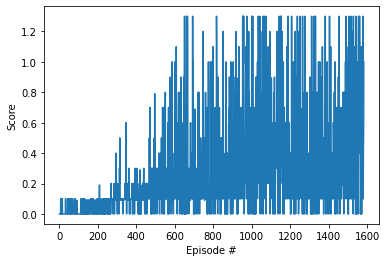

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()